In [1]:
# objective: identify trend across 2021 until 2023 of answers who have been to rehab 
# and continue to use drugs

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyreadr

In [37]:
df23 = pd.read_csv("data_2023_preprocessed.csv")
df22 = pd.read_csv("data_2022_preprocessed.csv")

display(df22)
display(df23)

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,IIEDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,...,FLVVAPYR,FLVVAPMON,SYNMRJYR,SYNMRJMON,SYNSTMYR,IMFYR,IMFMON,ILIMFOTHMN,CODRGUSE,LANGVER
0,6.0,1.0,1.0,1.0,1.0,7.0,1.0,2.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,2.0
1,9.0,3.0,0.0,2.0,4.0,11.0,1.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
2,6.0,3.0,0.0,2.0,1.0,11.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.0
3,7.0,1.0,0.0,1.0,1.0,8.0,1.0,3.0,2.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.0
4,10.0,2.0,0.0,2.0,3.0,11.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48060,3.0,2.0,1.0,2.0,4.0,7.0,1.0,1.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.0
48061,11.0,4.0,0.0,2.0,1.0,11.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
48062,10.0,3.0,0.0,1.0,3.0,8.0,1.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0
48063,7.0,2.0,0.0,2.0,4.0,8.0,1.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0


,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,IIEDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,...,FLVVAPYR,FLVVAPMON,SYNMRJYR,SYNMRJMON,SYNSTMYR,IMFYR,IMFMON,ILIMFOTHMN,CODRGUSE,LANGVER
0,10.0,2.0,0.0,1.0,1.0,9.0,1.0,4.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.0
1,9.0,2.0,0.0,1.0,4.0,8.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0
2,9.0,3.0,0.0,2.0,1.0,8.0,1.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
3,10.0,1.0,0.0,1.0,1.0,11.0,1.0,4.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0
4,4.0,3.0,0.0,1.0,4.0,8.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51039,9.0,4.0,0.0,2.0,4.0,1.0,1.0,3.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,2.0
51040,11.0,2.0,0.0,2.0,1.0,10.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,1.0
51041,10.0,2.0,0.0,2.0,4.0,11.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
51042,11.0,2.0,0.0,1.0,1.0,11.0,1.0,4.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0


In [57]:
rehab = (df23[['IRMHTINRHAB', 'IRMHTOUTRHAB', 'IRSUTINRHAB', 'IRSUTOUTRHAB']] == 1).any(axis=1)
df23_rehab = df23[rehab]

# not in index: ['METHAMREC', 'INHALREC', 'LSDREC', 'HALLUCREC', 'ECSTMOREC', 'PCPREC', 'HERREC', 'COCREC', 'CRAKREC', 'BLNTREC', 'MJREC', 'ALCREC', 
# 'CIGARREC', 'SMKLSSREC', 'NICVAPREC']
drugcondition1 = (df23_rehab[['SYNSTMREC', 'SYNMRJREC', 'KRATREC', 'FLVVAPREC', 'METHNDLRC', 'HRSMKREC', 'HRSNFREC', 'OTDGNDLRC', 'GHBREC', 'CONDLREC', 'COLDREC',
                        'KETMINREC', 'DAMTFXREC', 'SALVIAREC', 'MKMBGHTREC', 'CBDHMPREC', 'MKMBGHTREC', 'CBDHMPREC']] < 3).any(axis=1)
drugcondition2 = (df23_rehab[['HRNDLREC', 'STMNDLREC']] < 13).any(axis=1)
df23_relapse = df23_rehab[drugcondition1 | drugcondition2]
df23_relapse['Relapse'] = 'yes'

display(df23_relapse)

/var/folders/85/rzkn78t10p72g2_nfq5ytx3w0000gn/T/ipykernel_5328/1628803083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23_relapse['Relapse'] = 'yes'


,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,IIEDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,...,FLVVAPMON,SYNMRJYR,SYNMRJMON,SYNSTMYR,IMFYR,IMFMON,ILIMFOTHMN,CODRGUSE,LANGVER,Relapse
17,10.0,4.0,0.0,1.0,4.0,11.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,yes
26,4.0,2.0,2.0,1.0,4.0,8.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,yes
282,9.0,5.0,3.0,2.0,4.0,9.0,1.0,3.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,yes
302,7.0,2.0,0.0,2.0,4.0,9.0,1.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,yes
352,9.0,5.0,998.0,1.0,2.0,4.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,98.0,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50470,9.0,5.0,2.0,1.0,2.0,8.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,yes
50585,8.0,1.0,0.0,2.0,3.0,9.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,yes
50693,8.0,1.0,1.0,2.0,4.0,9.0,1.0,3.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,yes
50780,8.0,2.0,1.0,2.0,4.0,6.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,yes


In [58]:
# df of those who didn't relapse
df23_normal = df23_rehab.merge(df23_relapse, how='left', indicator=True)
df23_normal = df23_normal[df23_normal['_merge'] == 'left_only'].drop(columns=['_merge'])
df23_normal['Relapse'] = 'no'

display(df23_normal)

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,IIEDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,...,FLVVAPMON,SYNMRJYR,SYNMRJMON,SYNSTMYR,IMFYR,IMFMON,ILIMFOTHMN,CODRGUSE,LANGVER,Relapse
5,11.0,3.0,0.0,1.0,2.0,8.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.0,no
6,11.0,4.0,2.0,2.0,2.0,8.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,no
8,11.0,4.0,1.0,2.0,2.0,11.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,no
12,5.0,3.0,2.0,1.0,4.0,5.0,1.0,2.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,2.0,no
13,4.0,4.0,0.0,1.0,4.0,8.0,1.0,2.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,9.0,3.0,0.0,2.0,2.0,5.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,no
746,9.0,4.0,0.0,2.0,1.0,7.0,1.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,no
748,9.0,3.0,0.0,1.0,4.0,5.0,1.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0,no
752,9.0,1.0,1.0,1.0,4.0,9.0,1.0,3.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.0,no


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df23_combined = pd.concat([df23_relapse, df23_normal], ignore_index=True)
X = df23_combined.drop(columns=['Relapse'])
X = pd.get_dummies(X)
y = df23_combined['Relapse'].map({'yes': 1, 'no': 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

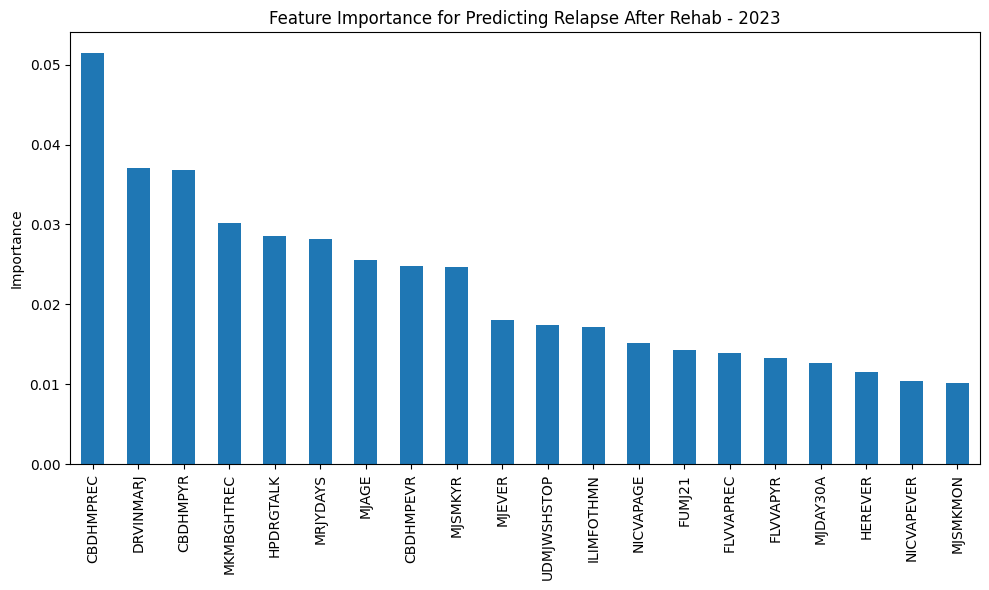

CBDHMPREC      0.051492
DRVINMARJ      0.037123
CBDHMPYR       0.036775
MKMBGHTREC     0.030230
HPDRGTALK      0.028546
                 ...   
SUTOUTMRJPY    0.000000
IIHERFM        0.000000
IISTMNM30FQ    0.000000
IIPNRNMINIT    0.000000
DAMTFXMON      0.000000
Length: 567, dtype: float64

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances[feature_importances > 0.01].plot(kind='bar')
plt.title('Feature Importance for Predicting Relapse After Rehab - 2023')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

display(feature_importances)

In [ ]:
print("Training Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9536423841059603


In [ ]:
def randomforest(df23):
    rehab = (df23[['IRMHTINRHAB', 'IRMHTOUTRHAB', 'IRSUTINRHAB', 'IRSUTOUTRHAB']] == 1).any(axis=1)
    df23_rehab = df23[rehab]

    # not in index: ['METHAMREC', 'INHALREC', 'LSDREC', 'HALLUCREC', 'ECSTMOREC', 'PCPREC', 'HERREC', 'COCREC', 'CRAKREC', 'BLNTREC', 'MJREC', 'ALCREC', 
    # 'CIGARREC', 'SMKLSSREC', 'NICVAPREC']
    drugcondition1 = (df23_rehab[['SYNSTMREC', 'SYNMRJREC', 'KRATREC', 'FLVVAPREC', 'METHNDLRC', 'HRSMKREC', 'HRSNFREC', 'OTDGNDLRC', 'GHBREC', 'CONDLREC', 'COLDREC',
                            'KETMINREC', 'DAMTFXREC', 'SALVIAREC', 'MKMBGHTREC', 'CBDHMPREC', 'MKMBGHTREC', 'CBDHMPREC']] < 3).any(axis=1)
    drugcondition2 = (df23_rehab[['HRNDLREC', 'STMNDLREC']] < 13).any(axis=1)
    df23_relapse = df23_rehab[drugcondition1 | drugcondition2]
    df23_relapse['Relapse'] = 'yes'

    display(df23_relapse)

    df23_normal = df23_rehab.merge(df23_relapse, how='left', indicator=True)
    df23_normal = df23_normal[df23_normal['_merge'] == 'left_only'].drop(columns=['_merge'])
    df23_normal['Relapse'] = 'no'

    display(df23_normal)    

    df23_combined = pd.concat([df23_relapse, df23_normal], ignore_index=True)
    X = df23_combined.drop(columns=['Relapse'])
    X = pd.get_dummies(X)
    y = df23_combined['Relapse'].map({'yes': 1, 'no': 0})
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importances[feature_importances > 0.01].plot(kind='bar')
    plt.title('Feature Importance for Predicting Relapse After Rehab - 2022')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
    display(feature_importances)
    print("Training Accuracy:", rf.score(X_train, y_train))
    print("Test Accuracy:", rf.score(X_test, y_test))


/var/folders/85/rzkn78t10p72g2_nfq5ytx3w0000gn/T/ipykernel_5328/556177511.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23_relapse['Relapse'] = 'yes'


,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,IIEDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,...,FLVVAPMON,SYNMRJYR,SYNMRJMON,SYNSTMYR,IMFYR,IMFMON,ILIMFOTHMN,CODRGUSE,LANGVER,Relapse
12,9.0,1.0,1.0,2.0,4.0,10.0,1.0,3.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,yes
24,8.0,3.0,0.0,2.0,4.0,9.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,yes
358,8.0,2.0,3.0,2.0,1.0,8.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,yes
469,8.0,3.0,3.0,2.0,4.0,10.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,yes
492,8.0,3.0,1.0,2.0,4.0,11.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47619,7.0,4.0,1.0,2.0,4.0,9.0,1.0,3.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,yes
47697,3.0,3.0,0.0,2.0,4.0,8.0,1.0,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,yes
47708,9.0,4.0,0.0,1.0,1.0,8.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,yes
47848,9.0,3.0,0.0,2.0,4.0,10.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,yes


,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,IIEDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,...,FLVVAPMON,SYNMRJYR,SYNMRJMON,SYNSTMYR,IMFYR,IMFMON,ILIMFOTHMN,CODRGUSE,LANGVER,Relapse
2,8.0,3.0,0.0,2.0,1.0,6.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0,no
3,9.0,4.0,0.0,1.0,1.0,5.0,1.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,no
4,9.0,3.0,2.0,2.0,3.0,8.0,1.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,no
5,8.0,3.0,1.0,1.0,4.0,8.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0,no
9,11.0,4.0,0.0,1.0,2.0,9.0,1.0,4.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,9.0,3.0,1.0,2.0,2.0,8.0,1.0,4.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,no
612,11.0,2.0,0.0,1.0,1.0,10.0,1.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0,no
614,5.0,2.0,3.0,1.0,4.0,9.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,no
617,1.0,3.0,0.0,1.0,99.0,3.0,1.0,4.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.0,no


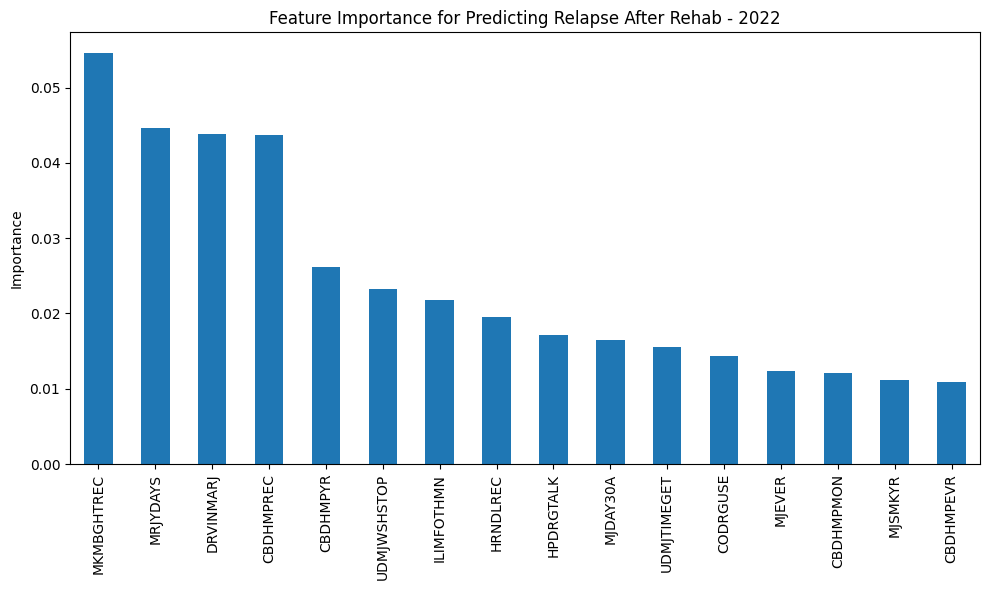

MKMBGHTREC    0.054603
MRJYDAYS      0.044608
DRVINMARJ     0.043827
CBDHMPREC     0.043690
CBDHMPYR      0.026218
                ...   
MJFQFLG       0.000000
MJSKNYR       0.000000
BLRECFL2      0.000000
SEDNORXFG     0.000000
DAMTFXMON     0.000000
Length: 567, dtype: float64

Training Accuracy: 1.0
Test Accuracy: 0.9206349206349206
None


In [70]:
print(randomforest(df22))